### Comparing the performance of XGBoost with foundation models using external dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import seaborn
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [68]:
df = pd.read_excel(r"C:\Users\lavan\Downloads\RA_NUIG\datasets\heart_disease_uci.xlsx", na_values=["", " ", "NA", "N/A"])
df = df.replace(r"^\s*$", pd.NA, regex=True)
df = df.rename(columns={'num': 'disease_present'}) # Renaming target column
df = df.drop(['id', 'dataset'], axis=1) 


df['disease_present'] = df.disease_present.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

#df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              920 non-null    int64  
 1   sex              920 non-null    object 
 2   cp               920 non-null    object 
 3   trestbps         861 non-null    float64
 4   chol             890 non-null    float64
 5   fbs              830 non-null    float64
 6   restecg          918 non-null    object 
 7   thalch           865 non-null    float64
 8   exang            865 non-null    float64
 9   oldpeak          858 non-null    float64
 10  slope            611 non-null    object 
 11  ca               309 non-null    float64
 12  thal             434 non-null    object 
 13  disease_present  920 non-null    int64  
dtypes: float64(7), int64(2), object(5)
memory usage: 100.8+ KB


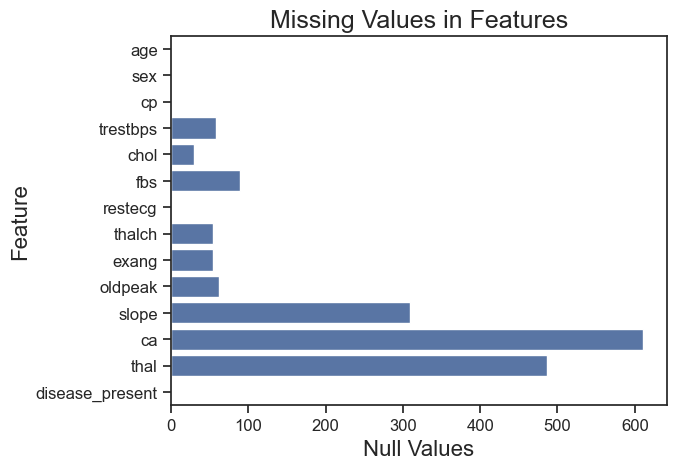

In [60]:
df_null = pd.DataFrame(df.isnull().sum().reset_index())
df_null.columns = ['feature', 'null_values']
df_null

# Barchart for null values
sns.barplot(y=df_null['feature'], x=df_null['null_values'], orient='h')
plt.title('Missing Values in Features', fontsize=18)
plt.xlabel('Null Values', fontsize=16)
plt.ylabel('Feature', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


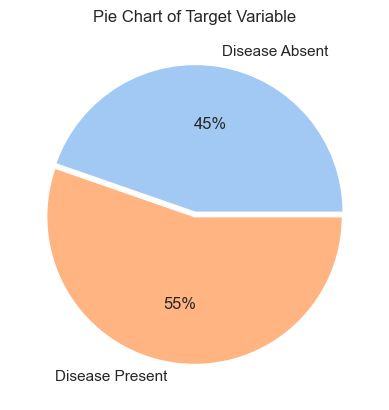

In [48]:
# Pie-chart of Target feature - disease_present

unique_values = df['disease_present'].unique()
counts = df['disease_present'].value_counts().sort_values()
percentages = counts / counts.sum() * 100
plt.pie(percentages, labels=['Disease Absent', 'Disease Present'],
        colors= seaborn.color_palette('pastel'), explode=[0.02,0.01], autopct='%.0f%%')
plt.title('Pie Chart of Target Variable')
plt.show()

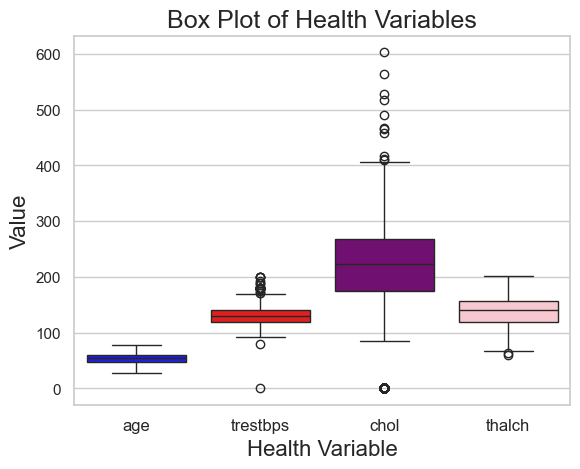

In [ ]:

health_variables = ['age', 'trestbps', 'chol', 'thalch']
colors = ['blue', 'red', 'purple', 'pink']
sns.set(style="whitegrid")

ax = sns.boxplot(data=df[health_variables], palette=colors)

ax.set_xticks(range(len(health_variables)))
ax.set_xticklabels(health_variables, fontsize=12)

ax.set_xlabel('Health Variable', fontsize=16)
ax.set_ylabel('Value', fontsize=16)
ax.set_title('Box Plot of Health Variables', fontsize=18)

plt.show()

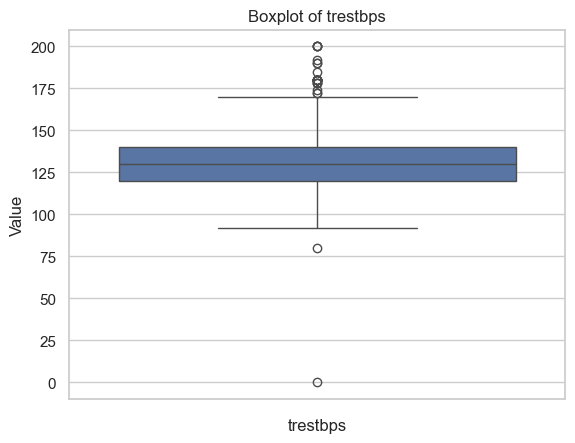

In [ ]:
numerical_features = ['age', 'trestbps', 'chol', 'fbs', 'exang', 'oldpeak', 'thalch']
feature = 'trestbps'
sns.boxplot( y=df[feature] );
plt.xlabel(feature)
plt.ylabel('Value')
plt.title('Boxplot of {}'.format(feature))
plt.show()

In [62]:

# Label Encoding for categorical features
label_encoder = LabelEncoder()
df['cp'] = label_encoder.fit_transform(df['cp'])
df['restecg'] = label_encoder.fit_transform(df['restecg'])
df['slope'] = label_encoder.fit_transform(df['slope'])
df['thal'] = label_encoder.fit_transform(df['thal'])
df['fbs'] = label_encoder.fit_transform(df['fbs'])
df['exang'] = label_encoder.fit_transform(df['exang'])

df['sex']=df['sex'].replace(('Male','Female'),(1,0))


C:\Users\lavan\AppData\Local\Temp\ipykernel_32460\42448209.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex']=df['sex'].replace(('Male','Female'),(1,0))


In [70]:
from sklearn.preprocessing import OrdinalEncoder
cat_cols = ["sex", "cp", "restecg", "slope", "thal"]
num_cols = [c for c in df.columns if c not in cat_cols + ["disease_present"]]

encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

df[cat_cols] = encoder.fit_transform(df[cat_cols])

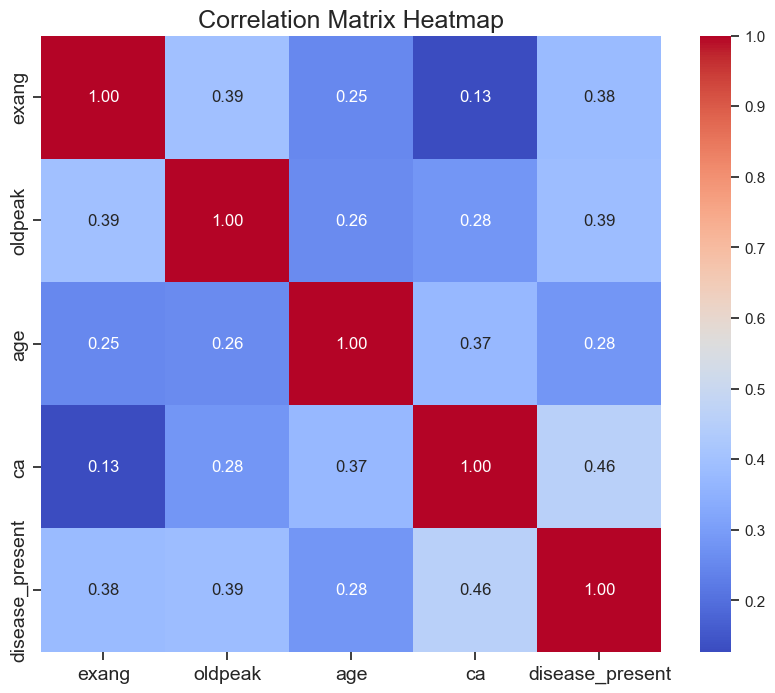

In [53]:

features_analysis=['exang', 'oldpeak',  'age', 'ca', 'disease_present']
for i in features_analysis:
    df[i] = pd.to_numeric(df[i], errors='coerce')

subset_data = df[features_analysis]

correlation_matrix = subset_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [78]:
df = df.copy()

X = df.drop(columns=["disease_present"])
y = df["disease_present"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [103]:
#============================ XGBoost ============================#

Accuracy for test set for XGBoost = 0.7989130434782609

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.72      0.76        80
           1       0.80      0.86      0.83       104

    accuracy                           0.80       184
   macro avg       0.80      0.79      0.79       184
weighted avg       0.80      0.80      0.80       184



Text(92.25, 0.5, 'Predicted')

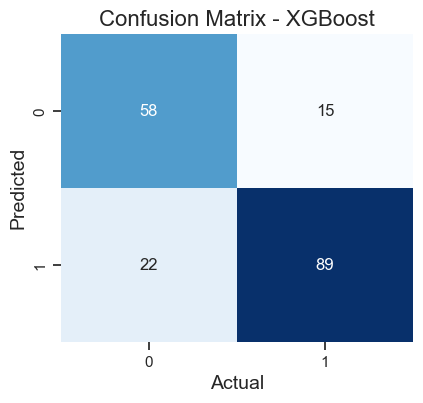

In [79]:
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

cm_test = confusion_matrix(y_pred, y_test)
#print("confusion matrix for test set", cm_test)
TP = cm_test[1, 1]  # True Positives
FP = cm_test[0, 1]  # False Positives
TN = cm_test[0, 0]  # True Negatives
FN = cm_test[1, 0]  # False Negatives

precision = TP/(TP+FP)
recall = TP/(TP+FN)
print("Accuracy for test set for XGBoost =", (TN + TP)/len(y_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
y_pred_train = xg.predict(X_train)

for i in range(0, len(y_pred_train)):
    if y_pred_train[i]>= 0.5:       # setting threshold to .5
       y_pred_train[i]=1
    else:
       y_pred_train[i]=0
        # Confusion Matrix Plot for Test & Training set
# Plot Confusion Matrices
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - XGBoost', fontsize = 16)
plt.xlabel('Actual', fontsize = 14)
plt.ylabel('Predicted', fontsize = 14)

c:\Users\lavan\AppData\Local\Programs\Python\Python313\Lib\site-packages\tabpfn\classifier.py:616: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client
  check_cpu_warning(


Accuracy for test set for TabPFN = 0.8260869565217391

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79        80
           1       0.83      0.88      0.85       104

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



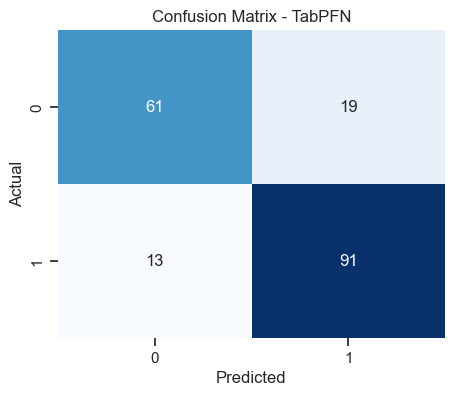

In [80]:
from tabpfn import TabPFNClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Model ---
tabpfn = TabPFNClassifier(device="cpu")
tabpfn.fit(X_train, y_train)

# --- Predictions ---
y_pred_test_proba = tabpfn.predict_proba(X_test)[:, 1]
y_pred_test = (y_pred_test_proba >= 0.5).astype(int)

# --- Confusion Matrix ---
cm_test = confusion_matrix(y_test, y_pred_test)

TP = cm_test[1, 1]
FP = cm_test[0, 1]
TN = cm_test[0, 0]
FN = cm_test[1, 0]

print("Accuracy for test set for TabPFN =", (TN + TP) / len(y_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

# --- Plot ---
plt.figure(figsize=(5,4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - TabPFN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Accuracy for test set for TabICL = 0.7989130434782609

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.72      0.76        80
           1       0.80      0.86      0.83       104

    accuracy                           0.80       184
   macro avg       0.80      0.79      0.79       184
weighted avg       0.80      0.80      0.80       184



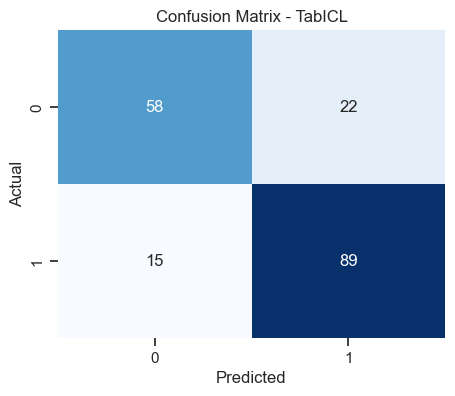

In [81]:
from tabicl import TabICLClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tabicl import TabICLClassifier

tabicl_model = TabICLClassifier()
tabicl_model.fit(X_train, y_train)

# --- Predictions ---
y_pred_test_proba = tabicl_model.predict_proba(X_test)[:, 1]
y_pred_test = (y_pred_test_proba >= 0.5).astype(int)

# --- Confusion Matrix ---
cm_test = confusion_matrix(y_test, y_pred_test)

TP = cm_test[1, 1]
FP = cm_test[0, 1]
TN = cm_test[0, 0]
FN = cm_test[1, 0]

print("Accuracy for test set for TabICL =", (TN + TP) / len(y_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

# --- Plot ---
plt.figure(figsize=(5,4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - TabICL')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
#============================ Visualizations comparing Models ============================#

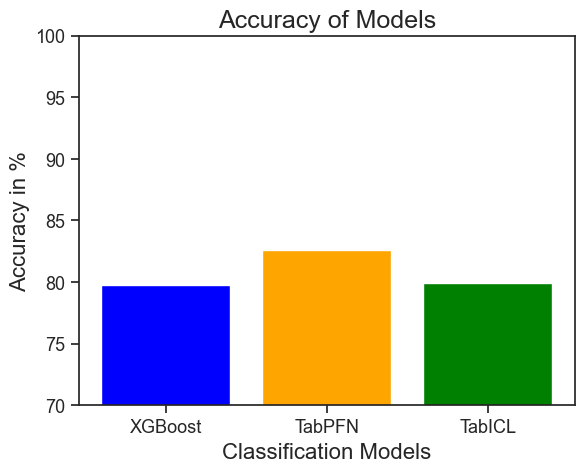

In [87]:
# Bar plot to compare accuracy of classifiers

# Accuracy scores of three models
models = ['XGBoost', 'TabPFN', 'TabICL']
accuracy = [79.80, 82.60, 79.89]  #

# Create bar chart
#plt.figure(figsize=(8, 6))
plt.bar(models, accuracy, color=['blue', 'orange', 'green'])

# Adding labels and title
plt.xlabel('Classification Models', fontsize=16)
plt.ylabel('Accuracy in %', fontsize=16)
plt.title('Accuracy of Models', fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Show the plot
plt.ylim(70, 100)  # Set the y-axis limits
plt.show()
